In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython import display
import seaborn as sns

df = pd.read_csv("delitos2019.csv")

In [6]:
print(f"Registros: {df.shape[0]} | Columnas: {df.shape[1]}")

Registros: 117661 | Columnas: 10


In [7]:
df.columns

Index(['id', 'fecha', 'franja_horaria', 'tipo_delito', 'subtipo_delito',
       'cantidad_registrada', 'comuna', 'barrio', 'lat', 'long'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117661 entries, 0 to 117660
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   117661 non-null  int64  
 1   fecha                117661 non-null  object 
 2   franja_horaria       117661 non-null  object 
 3   tipo_delito          117661 non-null  object 
 4   subtipo_delito       11676 non-null   object 
 5   cantidad_registrada  117661 non-null  float64
 6   comuna               117064 non-null  float64
 7   barrio               117064 non-null  object 
 8   lat                  117064 non-null  float64
 9   long                 117064 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 9.0+ MB


In [20]:
df

,id,fecha,franja_horaria,tipo_delito,subtipo_delito,cantidad_registrada,comuna,barrio,lat,long
0,374556,2019-01-01,12,Lesiones,Siniestro Vial,1.0,4.0,Nueva Pompeya,-34.648387,-58.404748
1,426152,2019-01-01,6,Robo (con violencia),NaN,1.0,9.0,Liniers,-34.649827,-58.513859
2,371604,2019-01-01,8,Lesiones,Siniestro Vial,1.0,15.0,Chacarita,-34.588108,-58.439392
3,425359,2019-01-01,16,Hurto (sin violencia),Hurto Automotor,1.0,10.0,Floresta,-34.631877,-58.483975
4,437571,2019-01-01,2,Robo (con violencia),Robo Automotor,1.0,4.0,Parque Patricios,-34.633161,-58.397123
...,...,...,...,...,...,...,...,...,...,...
117656,486770,2019-12-31,18,Robo (con violencia),Robo Automotor,1.0,8.0,Villa Riachuelo,-34.692347,-58.472299
117657,486678,2019-12-31,4,Robo (con violencia),Robo Automotor,1.0,5.0,Boedo,-34.626424,-58.422846
117658,486668,2019-12-31,1,Robo (con violencia),Robo Automotor,1.0,1.0,Monserrat,-34.615892,-58.370573
117659,486750,2019-12-31,14,Robo (con violencia),Robo Automotor,1.0,15.0,Villa Crespo,-34.602577,-58.433145


In [53]:
barrios = df.loc[:,"barrio"].sort_values().unique()

In [75]:
barrios_cantr = df.loc[:, ["barrio", "cantidad_registrada"]].groupby(["barrio"]).sum().sort_values(by="cantidad_registrada", ascending=False)
barrios_cantr.iloc[0:10, :]

,cantidad_registrada
barrio,
Palermo,9560.0
Balvanera,9239.0
San Nicolás,6246.0
Recoleta,5589.0
Flores,5518.0
Caballito,4962.0
Almagro,4914.0
Belgrano,4003.0
Retiro,3933.0


Text(0, 0.5, 'Number of answers')

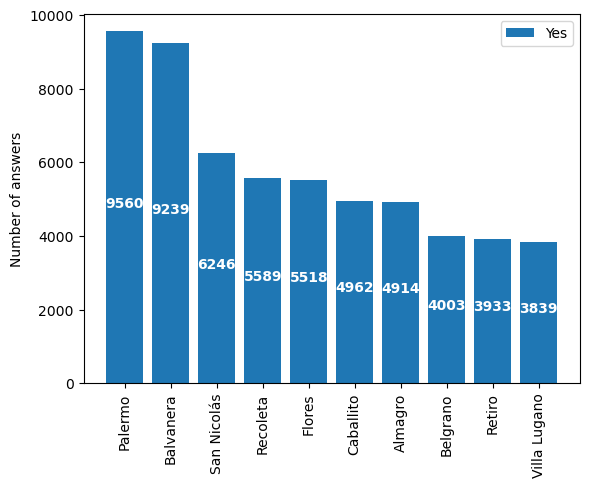

In [81]:
groups = barrios_cantr.iloc[0:10, :].index
values1 = barrios_cantr.iloc[0:10, :].values.flatten()


fig, ax = plt.subplots()

# Stacked bar chart
ax.bar(groups, values1, label = "Yes")

# Labels
plt.xticks(groups, rotation='vertical')
for bar in ax.patches:
  ax.text(bar.get_x() + bar.get_width() / 2,
          bar.get_height() / 2 + bar.get_y(),
          round(bar.get_height()), ha = 'center',
          color = 'w', weight = 'bold', size = 10)

ax.legend()
ax.set_ylabel('Number of answers')

# plt.show()

In [24]:
df.loc[:,"tipo_delito"].unique()

array(['Lesiones', 'Robo (con violencia)', 'Hurto (sin violencia)',
       'Homicidio'], dtype=object)

In [37]:
df.loc[:, ["tipo_delito", "subtipo_delito", "cantidad_registrada"]].groupby(["tipo_delito", "subtipo_delito"], dropna=False,).sum().sort_values(by=["tipo_delito"])

cantidad_registrada
tipo_delito           subtipo_delito                      
Homicidio             Doloso                         100.0
                      Siniestro Vial                  93.0
Hurto (sin violencia) Hurto Automotor               4654.0
                      NaN                          44617.0
Lesiones              Siniestro Vial                5408.0
Robo (con violencia)  Robo Automotor                1428.0
                      NaN                          61368.0

In [98]:
df["franja_horaria"] = pd.to_numeric(df["franja_horaria"], errors='coerce')

fh_cantr = df.loc[:, ["franja_horaria", "cantidad_registrada"]].groupby(["franja_horaria"]).sum()
fh_cantr

,cantidad_registrada
franja_horaria,
0.0,3075.0
1.0,2445.0
2.0,1965.0
3.0,1719.0
4.0,1815.0
5.0,2357.0
6.0,2998.0
7.0,3899.0
8.0,5122.0


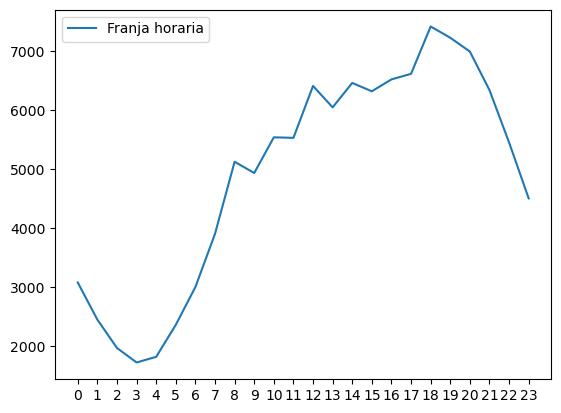

In [119]:
franjas_horaria = fh_cantr.index
cantidades_registradas = fh_cantr.values

fig, ax = plt.subplots()

ax.plot(franjas_horaria, cantidades_registradas, label="Franja horaria")
plt.xticks(franjas_horaria)

ax.legend()

plt.show()
